# <span style="color:#0b486b">  FIT5215: Deep Learning (2021)</span>
***
*CE/Lecturer:*  **Dr Trung Le** | trunglm@monash.edu <br/>
*Head TA:*  **Dr Van Nguyen** | van.nguyen1@monash.edu <br/>
*Tutor:* **Mr Anh Bui** \[tuananh.bui@monash.edu\] | **Mr Tuan Nguyen**  \[tuan.ng@monash.edu \] | **Dr Binh Nguyen** \[binh.nguyen1@monash.edu\] | **Dr Mahmoud Mohammad** \[mahmoud.hossam@monash.edu\]
<br/> <br/>
Faculty of Information Technology, Monash University, Australia
***


# <span style="color:#0b486b">Tutorial 3a: Feed-forward Neural Nets with TensorFlow 1.x</span> 
**The purpose of this tutorial is to demonstrate how to work with an open-source software library for developing deep neural network applications, called TensorFlow. In this tutorial, we will focus on**:  
- ***Inspect the common pipeline of deep learning*.**
- ***How to implement a feedforward neural net for a multi-class classification problem using TF 1.x in Tutorial 2a*.**
- ***How to implement a feedforward neural net for a multi-class classification problem using TF 2.x in Tutorial 2b*.**

***

### <span style="color:#0b486b"> II.1 Feedforward Neural Network </span> <span style="color:red">***** (highly important)</span>
#### <span style="color:#0b486b"> Tutorial objective </span>

In this tutorial, we will consider a fairly realistic deep NN with *three* layers plus the *output* layer. Its architecture will be specified as $16 \rightarrow 10 (ReLU) \rightarrow 20 (ReLU) \rightarrow 15 (ReLU) \rightarrow 26$. This means:
- The input size is 16
- The first layer has 10 hidden units with 10 ReLU activation functions
- The second layer has 20 hidden units with 20 ReLU activation functions
- The third layer has 15 hidden units with 15 ReLU activation functions
- And the output layer is a logit layer with 26 hidden units

This network, for example, can take the `letter` dataset input with $16$ features and with $26$ classes (A-Z). **Our objective in this tutorial is to implement this specific network in `TensorFlow 1.x`.**

#### <span style="color:#0b486b">Specifying the Neural Network Architecture </span>

We can visualize this network as in the figure below. Please note that for readability, the number of hidden units in the figure might not correspond exactly to the actual size of the hidden units used.

<img src="./images/DNN_Pipeline.png" width="1000">

Furthermore, the above figure shows the pipeline of the entire process for feeding a mini-batch of batch size $32$ into the network. Using ***mini-batch*** is a common way to train deep NNs in practice.

Let us denote the mini-batch by $X_b= \{(x_1, y_1),\dots, (x_{32}, y_{32})\}$. The mini-batch can be stored using a $2D$ tensor with the shape $(32, 16)$. Assume that in this network, we use the activation function $ReLu$ where $ReLu(t)= \max\{0, t\}$. The computation in the forward propagation step is as follows:
- Input $X_b$ with a mini-batch size of 32
- $h_1= ReLu(X_b \times W^1 + b^1)\in \mathbb{R}^{32 \times 10}$. 
- $h_2= ReLu(h_1 \times W^2 + b^2)\in \mathbb{R}^{32 \times 20}$. 
- $h_3= ReLu(h_2 \times W^3 + b^3)\in \mathbb{R}^{32 \times 15}$. 
- $logits= h_3 \times W^4 + b^4 \in \mathbb{R}^{32 \times 26}$
- $p = softmax(logits) \in \mathbb{R}^{32 \times 26}$ <br>

where we note that the activation function is performed element-wise and the softmax function is used to transform a vector of scalars to a discrete distribution as: 

$$softmax(z)=\big[\frac{\exp(z_i)}{\sum_{j=1}^{26}{\exp(z_j)}}\big]_{i=1}^{26}$$

    
The $k$-th row $p_k$ of the matrix $p$ can represent the probability distribution to classify the data point $x_k$ to classes $1,2,\dots,26$. In particular, we have:

$$p_{km}= p(y_k=m \mid x_k)  \text{ for }  m=1,2,\dots,26$$

**<span style="color:red"> Exercise 1</span>** : Explain why the dimension for $h_1$ is $32\times 10$? and similarly work out the dimension for $h2, h3, logits$ and $p$.

Answers admitted.

#### <span style="color:#0b486b">Specifying the Loss Function </span>
Essential to training a deep NN is the concept of the **loss function**. This function will tell us how good the network is predicting, and hence we can use this loss to find the network weights in such a way that the loss can be minimized.

For the classification task, a common approach is to use the **cross-entropy** loss function. Given a data-label instance $(x_k,y_k)$ where feature $x_k\in \mathbb{R}^{16}$ and label $y_k \in \mathbb{R}^{26}$ is a one-hot vector (for example if $x_k$ is in class 2, then $y_k=[0,1,0,...,0]$). The cross-entropy between the classification distribution $p_k$ returned from the NN and true label distribution $y_k$ is defined as:
$$cross\_entropy(y_k, p_k)=-\sum_{j=1}^{26}y_{kj}\log{p_{kj}}=-\log p_{km_k}$$
where $m_k$ denotes the class for $x_k$ (hence the one-hot vector $y_k$ is zero everywhere except at position $m_k$). This loss basically enforces the model to predict the label as close as the true label by minimizing $cross\_entropy(y_k, p_k)$.

The above loss function was applied for each instance. For the entire current mini-batch, our loss function becomes: 
$$\min \sum_{k=1}^{32}cross\_entropy(y_k, p_k)$$

**<span style="color:red"> Exercise 2: </span>** : **<span style="color:#0b486b">In the cross-entropy equation above, $m_k$ is the class for $x_k$, explain why the end result is $-\log p_{km_k}$.</span>**

The reason is that only $y_{km_k}=1$ and others $y_{km_j}=0, \forall j \neq m_k$.

**<span style="color:red"> Exercise 3: </span>** : **<span style="color:#0b486b">Let $p=[0.1, 0.3, 0.6]$ and $q=[0.0, 0.5, 0.5]$ be two discrete distributions, what is the $cross\_entropy(q,p)$ ?</span>**

In [1]:
import numpy as np
p = np.array([0.1, 0.3, 0.6])
q = np.array([0.0, 0.5, 0.5])
ce = -np.sum(q * np.log(p))
print(ce)

0.8573992140459634


### <span style="color:#0b486b"> II.2 Implementation with TensorFlow 1.x</span> <span style="color:red">**** (important)</span>
We now shall implement the aforementioned network with the architecture of $16 \rightarrow 10 (ReLU) \rightarrow 20 (ReLU) \rightarrow 15 (ReLu) \rightarrow 26$ in Tensorflow using the dataset `letter`. 

This letter dataset can be found at [the LIBSVM website](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html#letter). Here is the dataset information:
-  *The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15*

A typical pipeline process of implementing a deep learning model is as follows:

1. **Data processing**: 
   - Load the dataset and split it into train, valid, and test sets.  
     
2. **Construction phase**: 
   - Define the NN model Construct the corresponding computational graph.
   - Define the loss function and the relevant measures of performance of interest (accuracy, F1, and AUC).
    
3. **Execution and evaluation phase**: 
   - Train the model using mini-batches from the train set by minimizing the loss function with an optimizer.
   - Predict the test set and assess its performance.

#### <span style="color:#0b486b">1. Data Processing </span>

We use `sklearn` to load the dataset.

In [2]:
import os
import numpy as np
from sklearn.datasets import load_svmlight_file

In [3]:
data_file_name= "letter_scale.libsvm"
data_file = os.path.abspath("./data/" + data_file_name)
X_data, y_data = load_svmlight_file(data_file)
X_data= X_data.toarray()
print("X data shape: {}".format(X_data.shape))
print("y data shape: {}".format(y_data.shape))
print("# classes: {}".format(len(np.unique(y_data))))
print(np.unique(y_data))

X data shape: (15000, 16)
y data shape: (15000,)
# classes: 26
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26.]


We use `sklearn` to split the dataset into the train, validation, and test sets. 


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def train_valid_test_split(data, target, train_size, test_size):
    valid_size = 1 - (train_size + test_size)
    X1, X_test, y1, y_test = train_test_split(data, target, test_size = test_size, random_state= 33)
    X_train, X_valid, y_train, y_valid = train_test_split(X1, y1, test_size = float(valid_size)/(valid_size+ train_size))
    return X_train, X_valid, X_test, y_train, y_valid, y_test

Instructions for updating:
non-resource variables are not supported in the long term


Next, we would like to encode the label in the form of numeric vector. For example, we want to turn $y\_data=["cat", "dog", "cat", "lion", "dog"]$ to $y\_data=[0,1,0,2,1]$.

To do this, in the following segment of code, we use the object `le` as an instance of the class `preprocessing.LabelEncoder()` which supports us to transform categorical labels in `y_data` to a numerical vector.

In [5]:
le = preprocessing.LabelEncoder()
le.fit(y_data)
y_data= le.transform(y_data)
print(y_data[:20])

[25 15 18  7  7  5 13 17 12  3 21  0 10  3 18  7  4 25 14 16]


We now use the function defined above to prepare our data for training, validating and testing.

In [6]:
X_train, X_valid, X_test, y_train, y_valid, y_test = train_valid_test_split(X_data, y_data, train_size=0.8, test_size=0.1)
y_train= y_train.reshape(-1)
y_test= y_test.reshape(-1)
y_valid= y_valid.reshape(-1)
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)
print("lables: {}".format(np.unique(y_train)))

(12000, 16) (1500, 16) (1500, 16)
(12000,) (1500,) (1500,)
lables: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


We catch some information of the training set which will be reused later.

In [7]:
train_size= int(X_train.shape[0])
n_features= int(X_train.shape[1])
n_classes= len(np.unique(y_train))
print(train_size, n_features, n_classes)

12000 16 26


Once again, in real-world implementation of deep learning models, we use Stochastic Gradient Descent (SGD). Input to this algorithm is a sequence of **mini-batch** of data drawn from the training dataset.

#### <span style="color:#0b486b">2. Construction Phase </span>

We build up a feedforward neural network with the architecture: $16 \rightarrow 10 (ReLU) \rightarrow 20 (ReLU) \rightarrow 15 (ReLu) \rightarrow 26$ in TensorFlow.

In [8]:
n_in= n_features    # dimension of input
n1= 10              # number of hidden units at the first layer
n2= 20              # number of hidden units at the second layer
n3= 15              # number of hidden units at the third layer
n_out= n_classes    # number of classification classes

The function `dense_layer` represents a fully connected layer in a deep learning network. This takes $W,b$ and input as inputs and returns $\sigma(W \times input + b)$ where the activation function $sigma$ is specified by the parameter `act`.
- In `TensorFlow`, we can refer to the `activation functions` as `tf.nn.relu`, `tf.nn.sigmoid`, `tf.nn.tanh`, and etc.
- You can also define your own activation function.

In [9]:
def dense_layer(inputs, output_size, act=None, name="hidden-layer"):
    with tf.name_scope(name):
        input_size= int(inputs.get_shape()[1])
        W_init = tf.random.normal([input_size, output_size], mean=0, stddev= 0.1, dtype= tf.float32)
        b_init= tf.random.normal([output_size], mean=0, stddev= 0.1, dtype= tf.float32)
        W= tf.Variable(W_init, name= "W")
        b= tf.Variable(b_init, name="b")
        Wxb= tf.matmul(inputs, W) + b
        if act is None:
            return Wxb
        else:
            return act(Wxb)

We now construct the computational graph. But before that we need to reset the default graph.

In [10]:
tf.reset_default_graph()
with tf.name_scope("network"):
    X= tf.placeholder(shape=[None, n_in], dtype= tf.float32)
    y= tf.placeholder(shape=[None], dtype= tf.int32)
    h1= dense_layer(X, n1, act= tf.nn.relu, name= "layer1")
    h2= dense_layer(h1, n2, act= tf.nn.relu, name= "layer2")
    h3= dense_layer(h2, n3, act= tf.nn.relu, name= "layer3")
    logits= dense_layer(h3, n_out, name="logits")

We compute the cross-entropy loss. Note that in TensorFlow you can use two of the following functions for evaluating the cross-entropy loss:
- `tf.nn.sparse_softmax_cross_entropy_with_logits`: if the labels `y_train` is in the categorial format (e.g., `y_train=[0,1,0,1,1,2]`).
- `tf.nn.softmax_cross_entropy_with_logits`: if the labels `y_train` is in the one-hot format (e.g., `y_train=[[1,0,0], [0,1,0], [1,0,0], [0,0,1]]`.

We also need to specify an optimizer to minimize the loss. Here, we are using the Adam optimizer for this optimization. 

In [11]:
with tf.name_scope('train'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits, name='xentropy')
    loss= tf.reduce_mean(xentropy, name="loss")
    tf.summary.scalar("loss", loss)        #summarize the loss
    optimizer= tf.train.AdamOptimizer(learning_rate=0.001)
    train_op= optimizer.minimize(loss)

In the above code, we add the line ***tf.summary.scalar("loss", loss)*** to add to the summary the loss.

We also wish to estimate the accuracy of our model. For this you can use the [*`in_top_k()`* function](https://www.tensorflow.org/api_docs/python/tf/nn/in_top_k) with *k=1*. This returns a 1D tensor full of boolean values, so we need to cast these booleans to floats and then compute the average. This will give us the network’s overall accuracy. We insert the line ***tf.summary.scalar("accuracy", accuracy)*** to add to the summary the accuracy.

In [12]:
with tf.name_scope('evaluation'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    tf.summary.scalar("accuracy", accuracy)  #summarize the accuracy

We now define two FileWriters to write the summary in two log folders. By this way, we can plot the train, valid losses (or accuracies) on the same graph. Note that you can use this trick when you want to display some plots on the same graph.

In [13]:
if(not os.path.exists("logs/example/train")):
    os.makedirs("logs/example/train")

if(not os.path.exists("logs/example/val")):
    os.makedirs("logs/example/val")
    
merged= tf.summary.merge_all()
train_writer= tf.summary.FileWriter("logs/example/train")
valid_writer= tf.summary.FileWriter("logs/example/val")

#### <span style="color:#0b486b">3. Execution and Evaluation Phase </span>

In the `execution phase`, we need to create a `TensorFlow session`, then initialize `all variables` in the graph, execute `train_op`, and query the values of necessary nodes (e.g., `loss` and `accuracy`).

- Initialize all variables
  - `init= tf.global_variables_initializer()` and `sess.run(init)`.

- Execute `train_op` when feeding mini-batches to the network
  - `sess.run([train_op], feed_dict={X:x_batch, y:y_batch})`

- Query the values of necessary nodes
  - `val_loss, val_accuracy= sess.run([loss, accuracy], feed_dict={X:X_valid, y:y_valid})`

Note that as a rule of machine learning, during the training phase, we **cannot** touch the `test set` and only use this set when we need to output the predictive performance of a trained model.
-  Output the predictive performance on the test set
   - `test_accuracy= sess.run(accuracy, feed_dict={X:X_test, y:y_test})`

In [14]:
import math
batch_size= 32
history= []  #used to store train, valid accuracies and losses for showing later
num_epoch = 100
iter_per_epoch= math.ceil(float(train_size)/batch_size)  #number of iterations per epoch

with tf.Session() as sess:
    init= tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(num_epoch):
        for idx_start in range(0, X_train.shape[0], batch_size):
            idx_end = min(X_train.shape[0], idx_start + batch_size)
            X_batch, y_batch = X_train[idx_start:idx_end], y_train[idx_start:idx_end]
            sess.run([train_op], feed_dict={X:X_batch, y:y_batch})
        #compute accuracies and losses at the end of each epoch
        train_summary, train_loss, train_accuracy= sess.run([merged,loss, accuracy], feed_dict={X:X_train, y:y_train})
        train_writer.add_summary(train_summary, epoch +1)
        train_writer.flush()
        
        valid_summary,val_loss, val_accuracy= sess.run([merged,loss, accuracy], feed_dict={X:X_valid, y:y_valid})
        valid_writer.add_summary(valid_summary, epoch +1)
        valid_writer.flush()
        print("Epoch {}: valid loss={:.4f}, valid acc={:.4f}".format(epoch+1, val_loss, val_accuracy))
        print("########: train loss={:.4f}, train acc={:.4f}".format(train_loss, train_accuracy))
        hist_item={"train_loss": train_loss, "train_acc": train_accuracy, 
                   "val_loss":val_loss, "val_acc": val_accuracy}
        history.append(hist_item)
    print("---------------------------------------------\n")
    test_accuracy= sess.run(accuracy, feed_dict={X:X_test, y:y_test})
    print("Test accuracy: {:.4f}".format(test_accuracy))

Epoch 1: valid loss=2.6206, valid acc=0.1467
########: train loss=2.6207, train acc=0.1616
Epoch 2: valid loss=2.1332, valid acc=0.3227
########: train loss=2.1224, train acc=0.3259
Epoch 3: valid loss=1.8235, valid acc=0.4180
########: train loss=1.7944, train acc=0.4273
Epoch 4: valid loss=1.7273, valid acc=0.4407
########: train loss=1.6949, train acc=0.4585
Epoch 5: valid loss=1.6804, valid acc=0.4647
########: train loss=1.6469, train acc=0.4759
Epoch 6: valid loss=1.6453, valid acc=0.4827
########: train loss=1.6113, train acc=0.4878
Epoch 7: valid loss=1.6145, valid acc=0.4960
########: train loss=1.5813, train acc=0.5028
Epoch 8: valid loss=1.5827, valid acc=0.5080
########: train loss=1.5504, train acc=0.5144
Epoch 9: valid loss=1.5499, valid acc=0.5220
########: train loss=1.5193, train acc=0.5240
Epoch 10: valid loss=1.5135, valid acc=0.5420
########: train loss=1.4858, train acc=0.5393
Epoch 11: valid loss=1.4745, valid acc=0.5533
########: train loss=1.4503, train acc=0.54

Epoch 91: valid loss=0.7495, valid acc=0.7793
########: train loss=0.6700, train acc=0.8002
Epoch 92: valid loss=0.7474, valid acc=0.7807
########: train loss=0.6673, train acc=0.8012
Epoch 93: valid loss=0.7449, valid acc=0.7807
########: train loss=0.6645, train acc=0.8019
Epoch 94: valid loss=0.7429, valid acc=0.7813
########: train loss=0.6619, train acc=0.8023
Epoch 95: valid loss=0.7409, valid acc=0.7833
########: train loss=0.6596, train acc=0.8027
Epoch 96: valid loss=0.7396, valid acc=0.7833
########: train loss=0.6575, train acc=0.8032
Epoch 97: valid loss=0.7371, valid acc=0.7853
########: train loss=0.6548, train acc=0.8049
Epoch 98: valid loss=0.7348, valid acc=0.7847
########: train loss=0.6523, train acc=0.8057
Epoch 99: valid loss=0.7325, valid acc=0.7853
########: train loss=0.6500, train acc=0.8058
Epoch 100: valid loss=0.7301, valid acc=0.7893
########: train loss=0.6475, train acc=0.8066
---------------------------------------------

Test accuracy: 0.7780


If you open the tensorboard, you can see the plots of train, valid losses on the same graph and plots of the train, valid accuracies on the same graph
- Open a command line, navigate to the folder of this tute and run **> tensorboard --logdir logs**
- Open your browser at https://localhost:6006

<img src="./images/TensorBoard.png" width="600"/>

#### <span style="color:#0b486b">4. Visualizing the Performance and Loss Objective Function </span>

Import the `matplotlib` package and set the figure size.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,10)

Plot the train, valid accuracies and losses stored in the `history`.

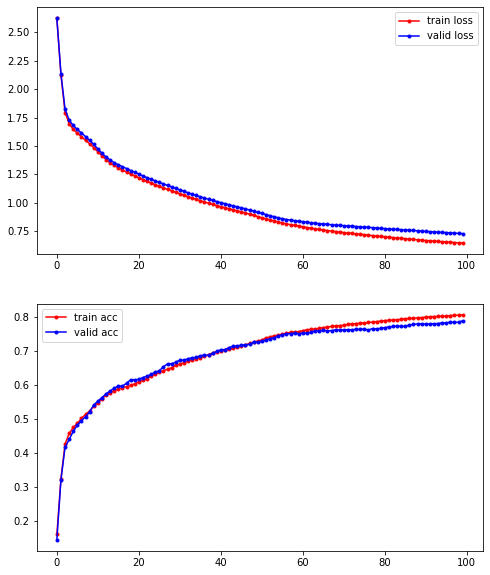

In [16]:
def plot_history(history):
    train_losses =[]
    train_accuracies=[]
    valid_losses=[]
    valid_accuracies=[]
    for h_item in history:
        train_losses.append(h_item["train_loss"])
        train_accuracies.append(h_item["train_acc"])
        valid_losses.append(h_item["val_loss"])
        valid_accuracies.append(h_item["val_acc"])
    plt.subplot(2,1,1)
    plt.plot(train_losses, "r.-", label="train loss")
    plt.plot(valid_losses, "b.-", label= "valid loss")
    plt.legend()
    plt.subplot(2,1,2)
    plt.plot(train_accuracies, "r.-", label="train acc")
    plt.plot(valid_accuracies, "b.-", label= "valid acc")
    plt.legend()

    plt.show()

plot_history(history)

### <span style="color:#0b486b"> Additional Exercises </span> 

1. Write your own code to save a trained model to the hard disk and restore this model, then use the restored model to output the prediction result on the test set.

2. Write code to add the plots of `test accuracy` and `loss` to the above line charts with your color of interest.

3. Insert new code to the above code to enable outputting to TensorBoard the values of `training loss`, `training accuracy`, `valid loss`, and `valid accuracy` at the end of epochs. You can refer to the code [here](https://www.tensorflow.org/guide/summaries_and_tensorboard).

4. Write code to do regression on the dataset `cadata` which can be downloaded [here](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression.html). Note that for a regression problem, you need to use the `L2` loss instead of the `cross-entropy` loss as in a classification problem. 

### <span style="color:#FFA500"> Solution for the exercise 1, 2 and 3

#### We now define two Tensorflow FileWriters to write the summary to two log folders.

In [17]:
if(not os.path.exists("logs/tf1/train")):
    os.makedirs("logs/tf1/train")

if(not os.path.exists("logs/tf1/val")):
    os.makedirs("logs/tf1/val")
    
if(not os.path.exists("logs/tf1/test")):
    os.makedirs("logs/tf1/test")

if(not os.path.exists("ckpt/tf1")):
    os.makedirs("ckpt/tf1")
    
merged= tf.summary.merge_all()
train_writer= tf.summary.FileWriter("logs/tf1/train")
valid_writer= tf.summary.FileWriter("logs/tf1/val")
test_writer= tf.summary.FileWriter("logs/tf1/test")

#### Train and save the model

In [18]:
batch_size= 32
history= []  #used to store train, valid accuracies and losses for showing later
num_epoch = 100
iter_per_epoch= math.ceil(float(train_size)/batch_size)  #number of iterations per epoch

with tf.Session() as sess:
    init= tf.global_variables_initializer()
    sess.run(init)
    
    saver = tf.train.Saver() # Add ops to save and restore all the variables.
    
    for epoch in range(num_epoch):
        for idx_start in range(0, X_train.shape[0], batch_size):
            idx_end = min(X_train.shape[0], idx_start + batch_size)
            X_batch, y_batch = X_train[idx_start:idx_end], y_train[idx_start:idx_end]
            sess.run([train_op], feed_dict={X:X_batch, y:y_batch})
        #compute accuracies and losses at the end of each epoch
        train_summary, train_loss, train_accuracy= sess.run([merged,loss, accuracy], feed_dict={X:X_train, y:y_train})
        train_writer.add_summary(train_summary, epoch +1)
        train_writer.flush()
        
        valid_summary, val_loss, val_accuracy= sess.run([merged,loss, accuracy], feed_dict={X:X_valid, y:y_valid})
        valid_writer.add_summary(valid_summary, epoch +1)
        valid_writer.flush()
        
        test_summary, test_loss, test_accuracy= sess.run([merged, loss, accuracy], feed_dict={X:X_test, y:y_test})
        test_writer.add_summary(test_summary, epoch +1)
        test_writer.flush()
        
        if epoch%10 == 0:
            print("Epoch {}/{}".format(epoch+1, num_epoch))
            print("\t train loss={:.4f}, train acc={:.4f}".format(train_loss, train_accuracy))
            print("\t valid loss={:.4f}, valid acc={:.4f}".format(val_loss, val_accuracy))
            print("\t test loss={:.4f}, test acc={:.4f}".format(test_loss, test_accuracy))
        
        hist_item={"train_loss": train_loss, "train_acc": train_accuracy, 
                   "val_loss":val_loss, "val_acc": val_accuracy,
                   "test_loss":test_loss, "test_acc": test_accuracy}
        history.append(hist_item)
        
    print("---------------------------------------------\n")
    test_accuracy= sess.run(accuracy, feed_dict={X:X_test, y:y_test})
    print("Test accuracy: {:.4f}".format(test_accuracy))
    
    print("---------------------------------------------\n")
    save_path = saver.save(sess, "ckpt/tf1/model.ckpt")
    print("Model is saved to: %s" % save_path)


Epoch 1/100
	 train loss=2.5485, train acc=0.2246
	 valid loss=2.5424, valid acc=0.2287
	 test loss=2.5262, test acc=0.2107
Epoch 11/100
	 train loss=1.3317, train acc=0.6059
	 valid loss=1.3413, valid acc=0.6113
	 test loss=1.3728, test acc=0.5940
Epoch 21/100
	 train loss=1.0919, train acc=0.6767
	 valid loss=1.1190, valid acc=0.6780
	 test loss=1.1600, test acc=0.6573
Epoch 31/100
	 train loss=0.9733, train acc=0.7129
	 valid loss=1.0068, valid acc=0.7180
	 test loss=1.0510, test acc=0.7027
Epoch 41/100
	 train loss=0.8833, train acc=0.7356
	 valid loss=0.9216, valid acc=0.7367
	 test loss=0.9698, test acc=0.7267
Epoch 51/100
	 train loss=0.8135, train acc=0.7520
	 valid loss=0.8578, valid acc=0.7553
	 test loss=0.9074, test acc=0.7413
Epoch 61/100
	 train loss=0.7654, train acc=0.7626
	 valid loss=0.8153, valid acc=0.7580
	 test loss=0.8642, test acc=0.7527
Epoch 71/100
	 train loss=0.7335, train acc=0.7729
	 valid loss=0.7875, valid acc=0.7720
	 test loss=0.8353, test acc=0.7587
E

- Open command line, nevigate to the folder of this tute and run **> tensorboard --logdir "logs/tf1"**

#### Plot the train, valid accuracies and losses stored in the history

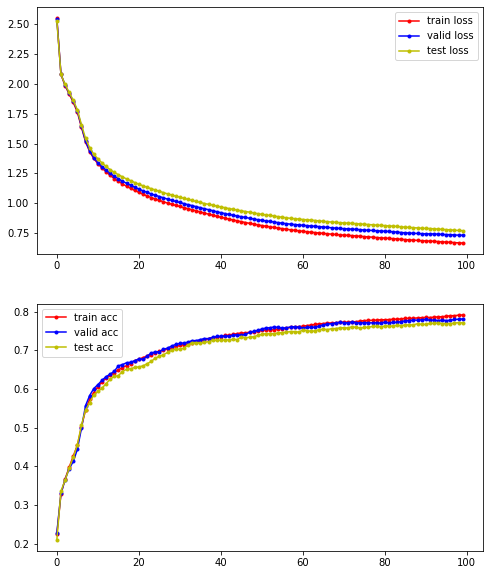

In [19]:
def plot_history_v2(history):
    train_losses =[]
    train_accuracies=[]
    valid_losses=[]
    valid_accuracies=[]
    test_losses=[]
    test_accuracies=[]
    for h_item in history:
        train_losses.append(h_item["train_loss"])
        train_accuracies.append(h_item["train_acc"])
        valid_losses.append(h_item["val_loss"])
        valid_accuracies.append(h_item["val_acc"])
        test_losses.append(h_item["test_loss"])
        test_accuracies.append(h_item["test_acc"])
    plt.subplot(2,1,1)
    plt.plot(train_losses, "r.-", label="train loss")
    plt.plot(valid_losses, "b.-", label= "valid loss")
    plt.plot(test_losses, "y.-", label= "test loss")
    
    plt.legend()
    plt.subplot(2,1,2)
    plt.plot(train_accuracies, "r.-", label="train acc")
    plt.plot(valid_accuracies, "b.-", label= "valid acc")
    plt.plot(test_accuracies, "y.-", label= "test acc")
    plt.legend()

    plt.show()

plot_history_v2(history)

#### Restore the saved model and predict some samples in the test set.

In [20]:
# We need to get tensor names of input X and output logits
X_name = X.name
logits_name = logits.name
print("Input name: ", X.name)
print("Output name: ", logits.name)

Input name:  network/Placeholder:0
Output name:  network/logits/add:0


In [21]:
# Assume that we only have the saved model to deploy and predict each sample at a time.

tf.reset_default_graph() # Clear all the default graph stack and resets the global default graph.
    
saver = tf.train.import_meta_graph('ckpt/tf1/model.ckpt.meta') # Load computational graph
with tf.Session() as sess:
    saver.restore(sess, "ckpt/tf1/model.ckpt") # Load saved weights
    
    # Get default graph (supply your custom graph if you have one)
    graph = tf.get_default_graph()

    # It will give tensor object
    X = graph.get_tensor_by_name('network/Placeholder:0')
    logits = graph.get_tensor_by_name('network/logits/add:0')
      
    # We predict first 5 samples
    for x in X_test[:5]:        
        x = np.expand_dims(x, axis=0)
        
        output = sess.run(logits, feed_dict={X:x})
        predicted = np.argmax(output)
        
        print(output)
        print("Model predicts: ", predicted)
        print("---------------------------------------------\n")


INFO:tensorflow:Restoring parameters from ckpt/tf1/model.ckpt
[[ -8.815776   -2.3259957  -9.119989    2.246305  -18.197033    1.6822797
   -9.59643    -7.906055   -4.053893   -3.5611804 -15.04044   -20.608627
  -27.016129   -8.691115   -7.9207067   4.3958683 -23.262846   -6.2989106
   -6.9420476  -6.3497896 -19.89806   -23.333694  -65.56244   -12.400206
  -17.81368   -22.071993 ]]
Model predicts:  15
---------------------------------------------

[[-13.387064   -33.33628      0.34920788 -11.653497    -2.8754768
  -62.82682      2.8226595  -10.16773     -6.325246    -2.9746988
  -21.992485   -19.425297   -66.02736    -36.54733     -3.4931486
   -6.382491    -1.8177103  -31.292831    -5.7363033   -8.4673395
  -16.583462   -44.25059    -89.67516    -22.697538   -23.513239
  -22.506298  ]]
Model predicts:  6
---------------------------------------------

[[ -5.439631    -2.101554    -5.1249895   -5.1688547    1.0334721
   -2.3085215   -1.6108465   -9.015166     1.5735028   -0.79963344
  -1

### <span style="color:#FFA500"> Solution for the exercise 4

In [22]:
# We load and process the dataset
data_file_name= "cadata.libsvm"
data_file = os.path.abspath("./data/" + data_file_name)
X_data, y_data = load_svmlight_file(data_file)
X_data= X_data.toarray()
y_data= y_data.reshape(y_data.shape[0],-1)
print("X data shape: {}".format(X_data.shape))
print("y data shape: {}".format(y_data.shape))
print("x-min={}, x-max={}".format(np.min(X_data), np.max(X_data)))
print("We need to scale the features of this data into [-1,1]")

X data shape: (20640, 8)
y data shape: (20640, 1)
x-min=-124.35, x-max=39320.0
We need to scale the features of this data into [-1,1]


In [23]:
# We scale the features of this data into [-1,1]
from sklearn.preprocessing import MinMaxScaler
X_data= MinMaxScaler(feature_range= (-1,1)).fit_transform(X_data)
print("x-min={}, x-max={}".format(np.min(X_data), np.max(X_data)))

x-min=-1.0, x-max=1.0


In [24]:
print("Before scaling: y-min ={}, y-max ={}".format(np.min(y_data), np.max(y_data)))
y_data= MinMaxScaler(feature_range= (-1,1)).fit_transform(y_data)
print("After scaling: y-min ={}, y-max ={}".format(np.min(y_data), np.max(y_data)))
print("Next step is to split the dataset into train set (80%), validation set (10%), and test set (10%)")

Before scaling: y-min =14999.0, y-max =500001.0
After scaling: y-min =-0.9999999999999999, y-max =1.0
Next step is to split the dataset into train set (80%), validation set (10%), and test set (10%)


In [25]:
# We split train, valid and test data
X_train, X_valid, X_test, y_train, y_valid, y_test = train_valid_test_split(X_data, y_data, train_size=0.8, test_size=0.1)
y_train= y_train.reshape(-1)
y_test= y_test.reshape(-1)
y_valid= y_valid.reshape(-1)
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)
print("Three sets are ready! Next step is to build up a deep neural network.")

(16512, 8) (2064, 8) (2064, 8)
(16512,) (2064,) (2064,)
Three sets are ready! Next step is to build up a deep neural network.


In [26]:
train_size= X_train.shape[0]
n_in= X_train.shape[1]
print("We now construct our network")

We now construct our network


In [27]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.reset_default_graph()

with tf.name_scope("network"):
    X= tf.placeholder(shape=[None, n_in], dtype= tf.float32)
    y= tf.placeholder(shape=[None], dtype= tf.float32)
    logits= dense_layer(X, 1, name="logits") # output has only one neuron

In [28]:
with tf.name_scope("train"):
    MSE = tf.reduce_mean(tf.square(logits - y))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
    train_op = optimizer.minimize(MSE)

In [29]:
batch_size= 32
num_epoch = 50
with tf.Session() as sess:
    init= tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(num_epoch):
        for idx_start in range(0, X_train.shape[0], batch_size):
            idx_end = min(X_train.shape[0], idx_start + batch_size)
            X_batch, y_batch = X_train[idx_start:idx_end], y_train[idx_start:idx_end]
            sess.run([train_op], feed_dict={X:X_batch, y:y_batch})
        # compute MSE at the end of each epoch
        train_MSE= sess.run(MSE, feed_dict={X:X_train, y:y_train})
        val_MSE= sess.run(MSE, feed_dict={X:X_valid, y:y_valid})
        print("Epoch {}/{}: train_loss: {} - valid_loss: {}".format(epoch+1, num_epoch, train_MSE, val_MSE))
        
    print("---------------------------------------------\n")
    test_MSE= sess.run(MSE, feed_dict={X:X_test, y:y_test})
    print("Test MSE = {}".format(test_MSE))

Epoch 1/50: train_loss: 0.22929111123085022 - valid_loss: 0.23800340294837952
Epoch 2/50: train_loss: 0.22613705694675446 - valid_loss: 0.23466163873672485
Epoch 3/50: train_loss: 0.22482436895370483 - valid_loss: 0.23333440721035004
Epoch 4/50: train_loss: 0.22434204816818237 - valid_loss: 0.2328415811061859
Epoch 5/50: train_loss: 0.22418415546417236 - valid_loss: 0.2326733022928238
Epoch 6/50: train_loss: 0.2241320163011551 - valid_loss: 0.2326134443283081
Epoch 7/50: train_loss: 0.22411015629768372 - valid_loss: 0.2325865775346756
Epoch 8/50: train_loss: 0.2240973860025406 - valid_loss: 0.23257064819335938
Epoch 9/50: train_loss: 0.2240884006023407 - valid_loss: 0.23255962133407593
Epoch 10/50: train_loss: 0.22408168017864227 - valid_loss: 0.2325514554977417
Epoch 11/50: train_loss: 0.2240765243768692 - valid_loss: 0.23254530131816864
Epoch 12/50: train_loss: 0.22407260537147522 - valid_loss: 0.23254065215587616
Epoch 13/50: train_loss: 0.22406965494155884 - valid_loss: 0.232537209

---
### <span style="color:#0b486b"> <div  style="text-align:center">**THE END**</div> </span>